In [353]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [354]:
df = pd.DataFrame({'x': [1,2,1,5,6,7,6],
                   'y': [2,1,3,4,3,2,1]})

In [355]:
df

,x,y
0,1,2
1,2,1
2,1,3
3,5,4
4,6,3
5,7,2
6,6,1


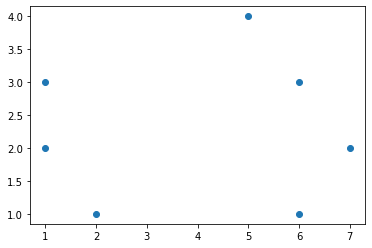

In [356]:
plt.scatter(df['x'], df['y'])

In [357]:
S = [[1,2], [2,1], [1,3], [5,4], [6,3], [7,2], [6,1]]
T = ['x1','x2','x3', 'x4', 'x5', 'x6', 'x7']

# Q1. (k-means clustering) What are the resulting clusters when the k-means algorithm is used with k = 3 and initial random means {(2, 2), (3, 4), (6, 2)} on the above dataset S?

<function matplotlib.pyplot.show(close=None, block=None)>

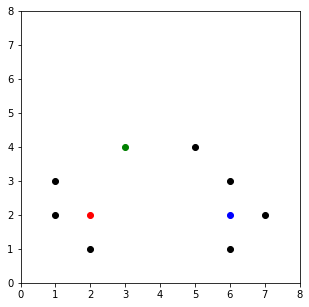

In [358]:
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color  = 'k')
colmap = {1: 'r', 2:'g', 3:'b'}

centroids = {1: [2, 2], 2: [3, 4], 3: [6, 2]}
k = 3
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0,8)
plt.ylim(0,8)
plt.show
    

In [359]:
df2 = df.copy()
def k_means(df, centroids):

    
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(
            np.sqrt(
                (df['x'] - centroids[i][0])**2
                +(df['y']-centroids[i][1])**2
            )
        )
        
    dist = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, dist].idxmin(axis = 1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [360]:
df2 = k_means(df2, centroids)
print(df2)

   x  y  distance_from_1  distance_from_2  distance_from_3  closest color
0  1  2         1.000000         2.828427         5.000000        1     r
1  2  1         1.000000         3.162278         4.123106        1     r
2  1  3         1.414214         2.236068         5.099020        1     r
3  5  4         3.605551         2.000000         2.236068        2     g
4  6  3         4.123106         3.162278         1.000000        3     b
5  7  2         5.000000         4.472136         1.000000        3     b
6  6  1         4.123106         4.242641         1.000000        3     b


<function matplotlib.pyplot.show(close=None, block=None)>

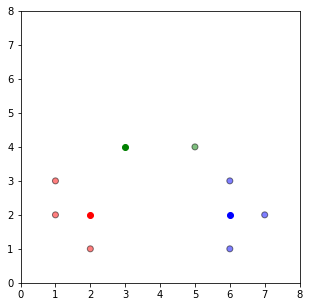

In [361]:
fig = plt.figure(figsize = (5,5))
plt.scatter(df2['x'], df2['y'], color = df2['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show

# Q2.  (k-means clustering) What are the final (k = 3) mean values after the k-means algorithm is used with initial (k = 3) mean values {(2,2),(3,4),(6,2)} on the above dataset S?

(0.0, 8.0)

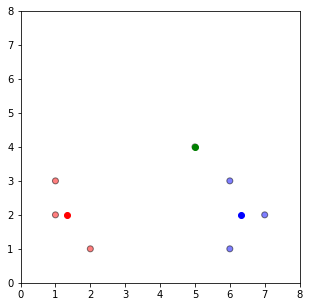

In [362]:
import copy

old_centroids = centroids.copy()

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df2[df2['closest']==i]['x'])
        centroids[i][1] = np.mean(df2[df2['closest']==i]['y'])
    return k
centroids = update(centroids)

fig = plt.figure(figsize = (5,5))
ax = plt.axes()
plt.scatter(df2['x'], df2['y'], color = df2['color'], alpha = 0.5, edgecolor = 'k')

for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 8)

# Q3. (k-means clustering) What are the resulting clusters when the k-means algorithm is used with k = 2 and initial random means {(3, 3), (4, 1)} on the above dataset S?

In [363]:
centroids2 = {1: [3, 3], 2: [4, 1]}
k = 2

<function matplotlib.pyplot.show(close=None, block=None)>

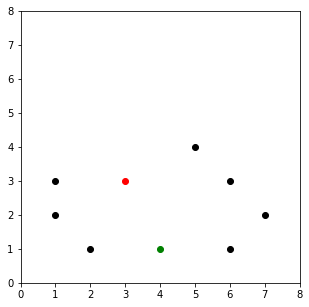

In [364]:
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color  = 'k')
colmap = {1: 'r', 2:'g', 3:'b'}

centroids2 = {1: [3, 3], 2: [4, 1]}
k = 2
for i in centroids2:
    plt.scatter(*centroids2[i], color = colmap[i])
plt.xlim(0,8)
plt.ylim(0,8)
plt.show

# Q4. (k-means clustering) What are the final (k = 2) mean values after the k-means algorithm is used with initial (k = 2) mean values {(3, 3), (4, 1)} on the above dataset S?

   x  y  distance_from_1  distance_from_2  closest color
0  1  2         2.236068         3.162278        1     r
1  2  1         2.236068         2.000000        2     g
2  1  3         2.000000         3.605551        1     r
3  5  4         2.236068         3.162278        1     r
4  6  3         3.000000         2.828427        2     g
5  7  2         4.123106         3.162278        2     g
6  6  1         3.605551         2.000000        2     g


<function matplotlib.pyplot.show(close=None, block=None)>

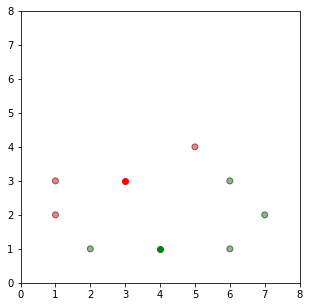

In [365]:
df3 = df.copy()
df3 = k_means(df3, centroids2)
print(df3)


fig = plt.figure(figsize = (5,5))
plt.scatter(df3['x'], df3['y'], color = df3['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids2.keys():
    plt.scatter(*centroids2[i], color = colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show

(0.0, 8.0)

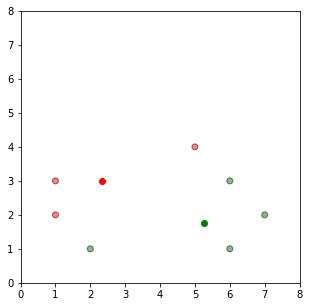

In [366]:
def update(k):
    for i in centroids2.keys():
        centroids2[i][0] = np.mean(df3[df3['closest']==i]['x'])
        centroids2[i][1] = np.mean(df3[df3['closest']==i]['y'])
    return k
centroids2 = update(centroids2)

fig = plt.figure(figsize = (5,5))
ax = plt.axes()
plt.scatter(df3['x'], df3['y'], color = df3['color'], alpha = 0.5, edgecolor = 'k')

for i in centroids2:
    plt.scatter(*centroids2[i], color = colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 8)

   x  y  distance_from_1  distance_from_2  closest color
0  1  2         1.666667         4.257347        1     r
1  2  1         2.027588         3.335416        1     r
2  1  3         1.333333         4.430011        1     r
3  5  4         2.848001         2.263846        2     g
4  6  3         3.666667         1.457738        2     g
5  7  2         4.772607         1.767767        2     g
6  6  1         4.176655         1.060660        2     g


<function matplotlib.pyplot.show(close=None, block=None)>

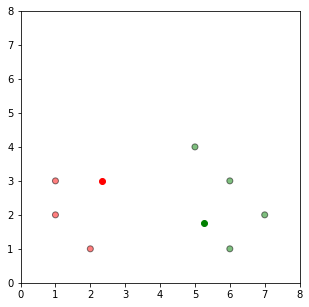

In [367]:
df3_1 = df3.copy()
df3_1 = k_means(df3_1, centroids2)
print(df3_1)


fig = plt.figure(figsize = (5,5))
plt.scatter(df3_1['x'], df3_1['y'], color = df3_1['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids2.keys():
    plt.scatter(*centroids2[i], color = colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show

# Q5. (k-medians clustering) What are the resulting clusters when the k-medians algorithm is used with k = 3 and initial random medians {(2,2),(3,4),(6,2)} on the above dataset S?

   x  y  distance_from_1  distance_from_2  distance_from_3  closest color
0  1  2         1.000000         2.828427         5.000000        1     r
1  2  1         1.000000         3.162278         4.123106        1     r
2  1  3         1.414214         2.236068         5.099020        1     r
3  5  4         3.605551         2.000000         2.236068        2     g
4  6  3         4.123106         3.162278         1.000000        3     b
5  7  2         5.000000         4.472136         1.000000        3     b
6  6  1         4.123106         4.242641         1.000000        3     b


<function matplotlib.pyplot.show(close=None, block=None)>

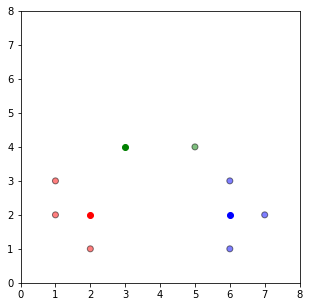

In [368]:
df4 = df.copy()
centroids3 = {1: [2, 2], 2: [3, 4], 3: [6, 2]}
def k_means(df, centroids):

    
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(
            np.sqrt(
                (df['x'] - centroids[i][0])**2
                +(df['y']-centroids[i][1])**2
            )
        )
        
    dist = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, dist].idxmin(axis = 1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df4 = k_means(df4, centroids3)
print(df4)
fig = plt.figure(figsize = (5,5))
plt.scatter(df4['x'], df4['y'], color = df4['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids3.keys():
    plt.scatter(*centroids3[i], color = colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show


(0.0, 8.0)

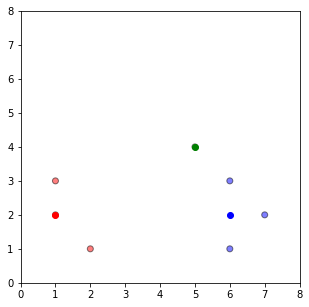

In [373]:
def update_3(k):
    for i in centroids.keys():
        centroids3[i][0] = np.median(df4[df4['closest']==i]['x'])
        centroids3[i][1] = np.median(df4[df4['closest']==i]['y'])
    return k
centroids3 = update_3(centroids3)

fig = plt.figure(figsize = (5,5))
ax = plt.axes()
plt.scatter(df4['x'], df4['y'], color = df4['color'], alpha = 0.5, edgecolor = 'k')

for i in centroids3:
    plt.scatter(*centroids3[i], color = colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 8)

# Q6. (k-medians clustering) What are the final (k = 3) median values after the k-medians algorithm is used with initial (k = 3) median values {(2, 2), (3, 4), (6, 2)} on the above dataset S?

   x  y  distance_from_1  distance_from_2  distance_from_3  closest color
0  1  2         0.000000         4.472136         5.000000        1     r
1  2  1         1.414214         4.242641         4.123106        1     r
2  1  3         1.000000         4.123106         5.099020        1     r
3  5  4         4.472136         0.000000         2.236068        2     g
4  6  3         5.099020         1.414214         1.000000        3     b
5  7  2         6.000000         2.828427         1.000000        3     b
6  6  1         5.099020         3.162278         1.000000        3     b


<function matplotlib.pyplot.show(close=None, block=None)>

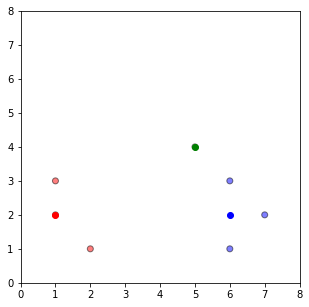

In [375]:
df4_1 = df4.copy()
print(k_means(df4_1, centroids3))
fig = plt.figure(figsize = (5,5))
plt.scatter(df4_1['x'], df4_1['y'], color = df4_1['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids3.keys():
    plt.scatter(*centroids3[i], color = colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show

# Q7. Find the value in b1.

In [407]:
from math import sqrt

#Euclidean distance btwn two vectors
def DL2(x,y):
    dist = 0.0
    for i in range(len(x)):
        dist += (x[i] - y[i])**2
    return sqrt(dist)

In [408]:
DL2(S[2], S[0])

1.0

# Q8. Find the value in b2

In [409]:
DL2(S[5], S[1])

5.0990195135927845

# Q9. Find the medoid of the dataset S.

In [419]:
!pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.7/382.7 KB 3.7 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Users/aigerimmansurova/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [432]:
kmedoids = KMedoids(n_clusters=1, random_state=0).fit(S)

In [433]:
kmedoids.labels_

array([0, 0, 0, 0, 0, 0, 0])

In [434]:
kmedoids.cluster_centers_

array([[6, 3]])